In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut  # To use cross-validation in (c); only available after scikit v0.17.1
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm  # To fit models using least squares

%matplotlib inline


/Users/lukwingsan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


question 8 (a)
Answer: 
n = number of observations = 100

p = number of predictors = 2 (X and X^2)

Y= X−2(X^2)+ϵ.

In [2]:
np.random.seed(1)  # Random numbers generated by Python are different from those generated by R, as mentioned in Exercise 3.11

y = np.random.normal(size=100)  # By default np.random.normal considers a standard normal, so we just have to define the size
x = np.random.normal(size=100)
epsilon = np.random.normal(size=100)

y = x - 2 * x**2 + epsilon

question 8 (b)
Answer:
Below are the comments:

1. Quadratic plot
2. Convex function with negative concavity
3. X from about -2 to 2
4. Y from about -10 to 2

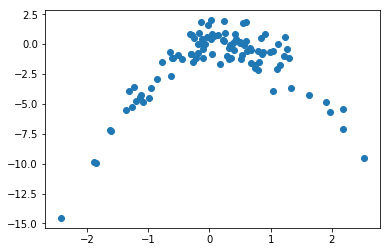

In [3]:
plt.scatter(x, y);

question 8 (c)

In [4]:
# Set new random seed
np.random.seed(5)
# Create LOOCV object
loo = LeaveOneOut()
# Organize data into a dataframe (easier to handle)
df = pd.DataFrame({'x':x, 'y':y})
# Initiate variables
min_deg = 1  # Minimum degree of the polynomial equations considered
max_deg = 4+1  # Maximum degree of the polynomial equations considered
scores = []

# Compute mean squared error (MSE) for the different polynomial equations.
for i in range(min_deg, max_deg):
    # Leave-one-out cross validation 
    for train, test in loo.split(df):
        X_train = df['x'][train]
        y_train = df['y'][train]
        X_test = df['x'][test]
        y_test = df['y'][test]
        
        # Pipeline
        model = Pipeline([('poly', PolynomialFeatures(degree = i)),
                      ('linear', LinearRegression())])
        model.fit(X_train[:,np.newaxis], y_train)
        
        # MSE
        score = mean_squared_error(y_test, model.predict(X_test[:,np.newaxis]))
        scores.append(score)
    print('Model %i (MSE): %f' % (i,np.mean(scores)))
    scores = []

Model 1 (MSE): 8.292212
Model 2 (MSE): 1.017096
Model 3 (MSE): 1.046553
Model 4 (MSE): 1.057493


question 8 (d)
Answer: The results are exactly the same because we only remove one observation from the training set. Thus, there is no random effect resulting from the observations used for the test set. LOOCV will always be the same, no matter the random seed.

In [5]:
# Set new random seed
np.random.seed(10)
# Compute MSE as in (c)
min_deg = 1  
max_deg = 4+1 
scores = []

for i in range(min_deg, max_deg):
    for train, test in loo.split(df):
        X_train = df['x'][train]
        y_train = df['y'][train]
        X_test = df['x'][test]
        y_test = df['y'][test]
        
        model = Pipeline([('poly', PolynomialFeatures(degree = i)),
                      ('linear', LinearRegression())])
        model.fit(X_train[:,np.newaxis], y_train)
        
        score = mean_squared_error(y_test, model.predict(X_test[:,np.newaxis]))
        scores.append(score)
    print('Model %i (MSE): %f' % (i,np.mean(scores)))
    scores = []

Model 1 (MSE): 8.292212
Model 2 (MSE): 1.017096
Model 3 (MSE): 1.046553
Model 4 (MSE): 1.057493


question 8 (e)
Answer: The model that has the smallest LOOCV error is model 2. This is expected because model 2 has the same form as y (second order polynomial).

If we used np.random.seed(0) instead of np.random.seed(1) or np.random.seed(10), the answer to the problem would be different. Using seed(0), the epsilon values are proportional higher to the remaining values in the y equation. Thus, its influence is greater and the random effect prevails over the second order parameters y. We didn't try what happens for other seed values, but there may be other seed values that produce a similar effect to seed(0).

question 8 (f)
Answer: When we have a second order polynomial, both x1 and x2 have high t-statistic values. When we have a third order polynomial, x2 has the highest t-statistic, followed by x1 and then by x3. Finally, when we have a fourth order polynomial, x2 is the variable with the highest t-statistic, followed by x1, x4 and x3.

In concludsion, x2 and x1 are variables with relevance for the presented models. These results agree with the conclusions drawn based on the cross-validation results, showing that the first and second order terms are the most significant.

In [6]:
# Models with polynomial features
min_deg = 1  
max_deg = 4+1 

for i in range(min_deg, max_deg):
    pol = PolynomialFeatures(degree = i)
    X_pol = pol.fit_transform(df['x'][:,np.newaxis])
    y = df['y']
    
    model = sm.OLS(y, X_pol)
    results = model.fit()
    
    print(results.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     9.460
Date:                Tue, 06 Mar 2018   Prob (F-statistic):            0.00272
Time:                        08:26:51   Log-Likelihood:                -242.69
No. Observations:                 100   AIC:                             489.4
Df Residuals:                      98   BIC:                             494.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7609      0.280     -6.278      0.0